In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Check One Labeled Data

In [2]:
df0 =pd.read_csv("Label Data-20230830T070214Z-001\Label Data\Label_000.csv", header=None)

In [3]:
df0

,0,1,2
0,2819.986311,2819.986311,Start to sleep
1,3041.878030,3045.269745,S1
2,3047.026899,3050.418614,S1
3,5039.720786,5043.194229,S1
4,5168.074725,5171.834216,S1
...,...,...,...
621,16433.840150,16437.191000,S1
622,16438.457780,16441.849500,S1
623,16496.893360,16500.080750,S1
624,16500.407660,16503.799380,S2


In [4]:
# Rename columns for clarity
df0.columns = ['start_time', 'end_time', 'level']

# Calculate duration
df0['duration'] = df0['end_time'] - df0['start_time']

# Display the updated DataFrame
print(df0)

       start_time      end_time           level  duration
0     2819.986311   2819.986311  Start to sleep  0.000000
1     3041.878030   3045.269745              S1  3.391715
2     3047.026899   3050.418614              S1  3.391715
3     5039.720786   5043.194229              S1  3.473443
4     5168.074725   5171.834216              S1  3.759491
..            ...           ...             ...       ...
621  16433.840150  16437.191000              S1  3.350850
622  16438.457780  16441.849500              S1  3.391720
623  16496.893360  16500.080750              S1  3.187390
624  16500.407660  16503.799380              S2  3.391720
625  16504.534930  16507.640600              S1  3.105670

[626 rows x 4 columns]


### Combine Data from All label

In [5]:
# Path to the folder containing CSV files
folder_path = 'Label Data-20230830T070214Z-001\Label Data'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to hold dataframes
dfs = []

# Loop through each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path, header=None)  # Assuming files don't have headers
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Rename columns for clarity
combined_df.columns = ['start_time', 'end_time', 'level']

In [6]:
#Check Null values
combined_df[combined_df.isnull().any(axis=1)]

,start_time,end_time,level
1077,11563.983630,11567.312170,NaN
7137,8294.597318,8297.687159,NaN
9310,4109.494442,4112.727508,NaN


#### Data Cleaning

In [16]:
# Drop rows with null values
combined_df.dropna(inplace=True)

In [17]:
# Calculate duration
combined_df['duration'] = combined_df['end_time'] - combined_df['start_time']

In [18]:
# Get distinct levels
combined_df['level'].unique()

array(['Start to sleep', 'S1', 'S2', 'S3', 'S1`', '1', 'S1  ', 'S!', '1S',
       'W1', 'SS1', 'D1'], dtype=object)

In [19]:
#assigned to new dataframe before replace the level
combined_df_new = combined_df.copy()

In [20]:
# Replace typo levels with 'S1'
typo_levels = ['1', 'S1`', 'S1  ','S!', '1S', 'W1', 'SS1', 'D1']
correct_level = 'S1'

combined_df_new['level'] = combined_df_new['level'].replace(typo_levels, correct_level)

In [21]:
# Check distinct levels
combined_df_new['level'].unique()

array(['Start to sleep', 'S1', 'S2', 'S3'], dtype=object)

In [22]:
combined_df_new

,start_time,end_time,level,duration
0,2819.986311,2819.986311,Start to sleep,0.000000
1,3041.878030,3045.269745,S1,3.391715
2,3047.026899,3050.418614,S1,3.391715
3,5039.720786,5043.194229,S1,3.473443
4,5168.074725,5171.834216,S1,3.759491
...,...,...,...,...
19965,5961.521731,5964.509268,S1,2.987537
19966,5966.790660,5969.778197,S1,2.987537
19967,5971.407763,5974.395300,S1,2.987537
19968,5975.427358,5978.414895,S1,2.987537


In [42]:
#Print the count for each level
level_count = combined_df_new['level'].value_counts()
print(level_count)

S1                18994
S2                  865
S3                   81
Start to sleep       27
Name: level, dtype: int64


#### load the data overview from the client

In [25]:
df_overview =pd.read_csv("Table.csv")

In [27]:
df_overview.head()

,wave_file,label_file,sample_rate,sleep_start,max_duration,min_duration,avg_duration,total_duration,max_samplenum,min_samplenum,avg_samplenum,total_samplenum,count_data_instance,count_s1,count_s2,count_s3
0,Video_00_039.wav,Label_039.csv,8000,300.039466,3.569243,2.958562,3.001892,381.240292,28553.9440,23668.4960,24015.13650,3.049922e+06,127,127,0,0
1,Video_00_044.wav,Label_044.csv,8000,540.064725,3.463639,2.952098,2.989290,547.040023,27709.1120,23616.7840,23914.31795,4.376320e+06,183,183,0,0
2,Video_00_049.wav,Label_049.csv,8000,299.968308,4.279418,2.810742,3.009516,4595.531213,34235.3440,22485.9360,24076.12947,3.676425e+07,1527,1527,0,0
3,Video_00_000.wav,Label_000.csv,44100,2819.986311,6.660838,2.451842,3.240931,2025.581895,293742.9558,108126.2322,142925.05850,8.932816e+07,625,605,20,0
4,Video_00_001.wav,Label_001.csv,8000,120.060280,3.747520,2.025057,3.080368,1654.157394,29980.1600,16200.4560,24642.94069,1.323326e+07,537,384,140,13


In [40]:
# Calculate the sum of each column and print the results
sum_s1 = df_overview['count_s1'].sum()
sum_s2 = df_overview['count_s2'].sum()
sum_s3 = df_overview['count_s3'].sum()

# Print the sums
print("Sum of 'count_s1':", sum_s1)
print("Sum of 'count_s2':", sum_s2)
print("Sum of 'count_s3':", sum_s3)

Sum of 'count_s1': 11585
Sum of 'count_s2': 851
Sum of 'count_s3': 81


In [41]:
level_count = combined_df_new['level'].value_counts()
print(level_count)

S1                18994
S2                  865
S3                   81
Start to sleep       27
Name: level, dtype: int64


In [43]:
level_count = combined_df['level'].value_counts()
print(level_count)

S1                18984
S2                  865
S3                   81
Start to sleep       27
1                     2
1S                    2
S1`                   1
S1                    1
S!                    1
W1                    1
SS1                   1
D1                    1
Name: level, dtype: int64


So after combined the data from each file, we have some typos for the level colum and we tried to convert it to S1 level. 

Then, We tried to count the level for all the files then compare it to the data overview from the client. There is a huge gap between total count s1 by the client overview data and our combined dataframe counts

From the overview thetal is 11585
Meanwhile our total after convert it is 18994
Even if we drop the level that has typo, the count foro level S1 is 18984.

So, we are actually not sure about which data that is dropped and counted by the client. But the next process, we are using the dataframe that the typo levels are converted.


### Data Cleaning and Output for each file for the next process

We are doing the data cleaning and convert the level for each file

In [59]:
output_folder = 'Cleaned Data'

In [62]:
# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to hold dataframes
dfs = []

# Loop through each CSV file, clean and preprocess the data, and save a new output file
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, header=None)  # Assuming files don't have headers
    
    # Perform data cleaning and preprocessing as needed
    
    # Drop rows with null values
    df.dropna(inplace=True)
    
    # Replace typo levels with 'S1'
    typo_levels = ['1', 'S1`', 'S1  ', 'S!', '1S', 'W1', 'SS1', 'D1']
    correct_level = 'S1'
    df[2] = df[2].replace(typo_levels, correct_level)
    
    # Calculate duration
    df['duration'] = df[1] - df[0]
    
    # Add headers to the DataFrame
    df.columns = ['start_time', 'end_time', 'level', 'duration']
    
    # Save the cleaned and processed DataFrame to a new output file
    output_file = f"{csv_file}" 
    output_path = os.path.join(output_folder, output_file)
    df.to_csv(output_path, index=False)


#### Descriptive Statistic

In [44]:
# Group data by level and calculate average duration
combined_df_new.groupby('level')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
S1,18994.0,3.076666,0.164908,1.955867,2.981100,3.013320,3.146530,6.66084
S2,865.0,3.086015,0.280219,1.531702,2.987537,3.079320,3.256300,4.10577
S3,81.0,2.978206,0.229648,2.281098,2.898452,2.987537,3.049224,3.61025
Start to sleep,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [45]:
#drop the start to sleep level
combined_df_new1 = combined_df_new[combined_df_new['level'] != 'Start to sleep']

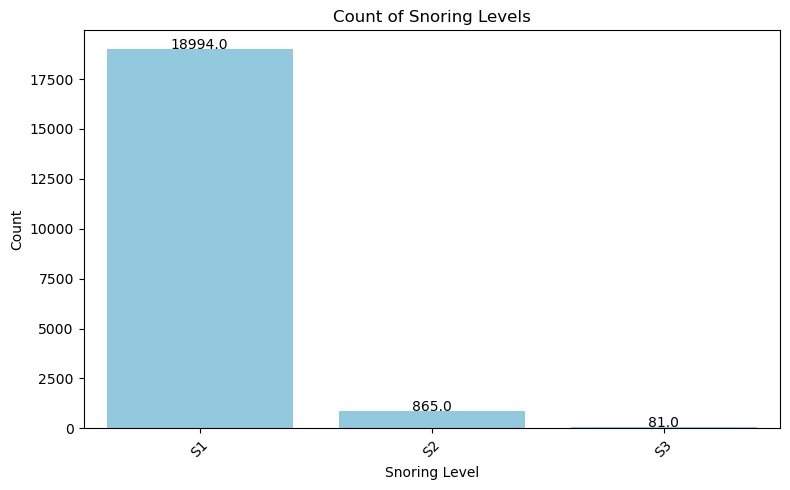

In [48]:
# Create a count plot of snoring levels without 'Start to sleep'

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=combined_df_new1, x='level', color='skyblue', order=combined_df_new1['level'].value_counts().index)
plt.xlabel('Snoring Level')
plt.ylabel('Count')
plt.title('Count of Snoring Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add count labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.tight_layout()
plt.show()

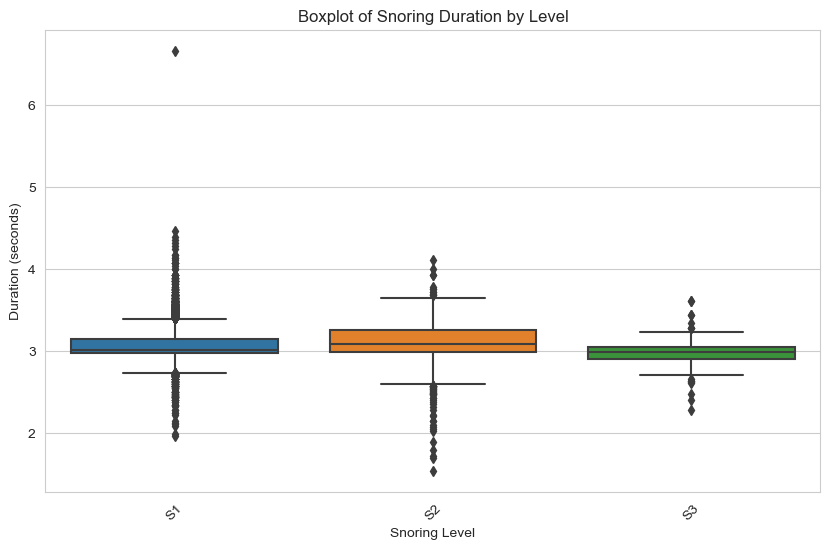

In [49]:
# Create a boxplot of snoring duration for each snoring level
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.boxplot(data=combined_df_new1, x='level', y='duration', order=combined_df_new1['level'].value_counts().index)
plt.xlabel('Snoring Level')
plt.ylabel('Duration (seconds)')
plt.title('Boxplot of Snoring Duration by Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()